In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from scipy import stats
from collections import defaultdict 
import os
!pip3 install pydicom
import pydicom
from google.colab import files
uploaded = files.upload()

     |████████████████████████████████| 1.9MB 12.4MB/s 


Saving stage_2_detailed_class_info.csv to stage_2_detailed_class_info.csv
Saving stage_2_sample_submission.csv to stage_2_sample_submission.csv
Saving stage_2_train_labels.csv to stage_2_train_labels.csv


In [2]:
classdetails = pd.read_csv("stage_2_detailed_class_info.csv")

In [3]:
classdetails.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [54]:
traindatalabels = pd.read_csv("stage_2_train_labels.csv")

In [55]:
traindatalabels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [57]:
traindatalabels['x'].fillna('0', inplace = True)
traindatalabels['y'].fillna('0', inplace = True)
traindatalabels['width'].fillna('0', inplace = True)
traindatalabels['height'].fillna('0', inplace = True)
traindatalabels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1
5,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1
6,00569f44-917d-4c86-a842-81832af98c30,0,0,0,0,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,0,0,0,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695,575,162,137,1


In [58]:
traindata = pd.concat([traindatalabels,classdetails['class']], axis =1, join = "inner")

In [59]:
traindata.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,0,0,0,0,0,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,0,0,0,0,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695,575,162,137,1,Lung Opacity


In [60]:
tempdata = (traindata.filter(['patientId','Target','class']))

In [61]:
tempdata.head(10)

,patientId,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,0,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity


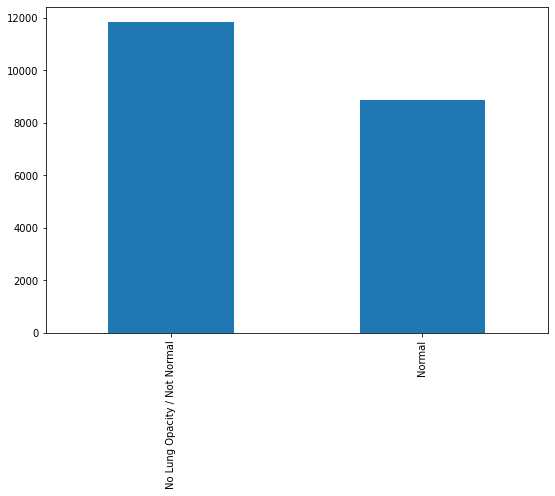

In [10]:
fig1 = tempdata[tempdata["Target"] == 0]["class"].value_counts().plot(kind = 'bar', figsize = (9,6)) 

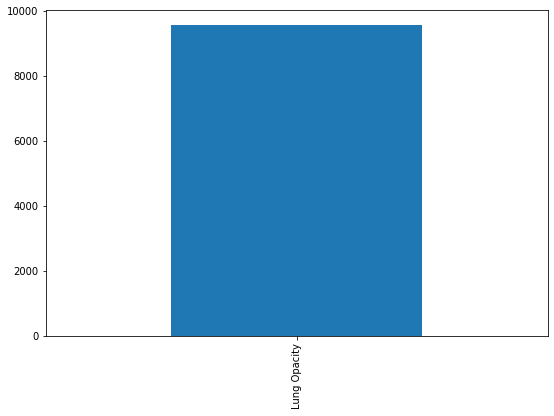

In [11]:
fig2 = tempdata[tempdata["Target"] == 1]["class"].value_counts().plot(kind = 'bar', figsize = (9,6)) 

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
Train_path = '/content/drive/My Drive/ProjectDataset/stage_2_train_images'
Test_path = '/content/drive/My Drive/ProjectDataset/stage_2_test_images'

1


Text(0.5, 0, '0')

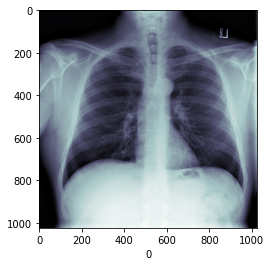

In [15]:
def readImages(folder):
  images = []
  for filename in os.listdir(folder):
    img = pydicom.dcmread(os.path.join(folder, filename))
    img_np = img.pixel_array
    if img is not None:
      images.append(img_np)
    break;
  return images
Train_df = readImages(Train_path)
print(len(Train_df))
plt.imshow(Train_df[0], cmap= plt.cm.bone )
plt.xlabel(tempdata["Target"][0])

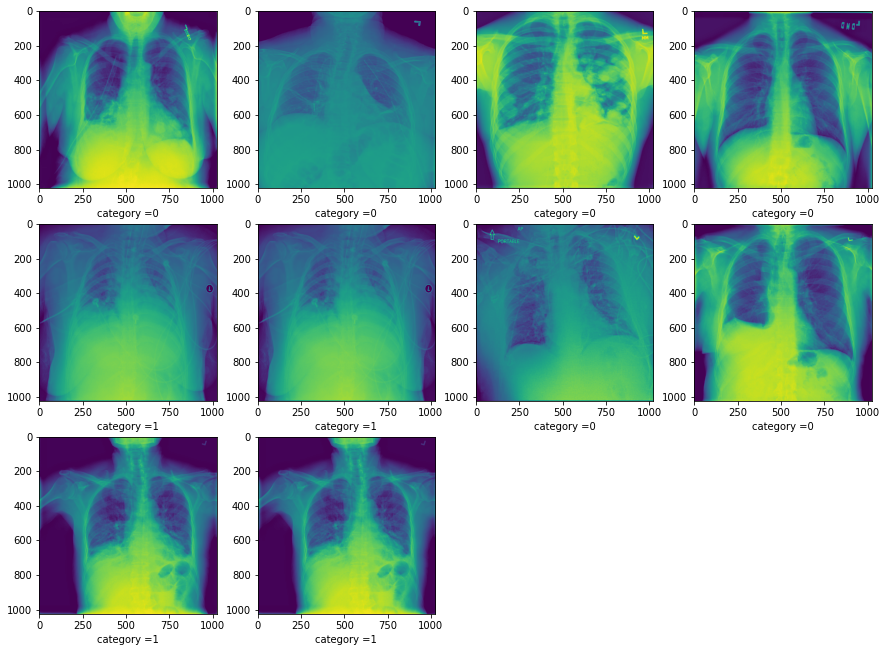

In [62]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.subplot(4,4,i+1)
  img = pydicom.dcmread(f'{os.path.join(Train_path, tempdata["patientId"][i])}.dcm')
  img_np = img.pixel_array
  plt.imshow(img_np)
  plt.xlabel("category ="+ str(tempdata["Target"][i]))

In [63]:
filenames = os.listdir(Train_path)
print("total length", len(filenames))
random.shuffle(filenames)
trainSamples = filenames[int(len(filenames)*0.2):]
validationSamples = filenames[:int(len(filenames)*0.2)]
print("total train length", len(trainSamples))
print("total test length", len(validationSamples))

total length 26684
total train length 21348
total test length 5336


Class For Loading Image data 


In [27]:
import cv2
import csv
from keras.utils import Sequence


In [65]:
traindatalabels

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1


In [71]:
opacityLoc = {}
with open(os.path.join('stage_2_train_labels.csv'), mode='r') as infile:
  print(infile)
  reader = csv.reader(infile)
  for row in reader:

    if row[5] == '1':
      location = [int(float(i)) for i in row[1:5]]
      if row[0] in opacityLoc:
        opacityLoc[row[0]].append(location)
      else:
        opacityLoc[row[0]] = [location]

<_io.TextIOWrapper name='stage_2_train_labels.csv' mode='r' encoding='UTF-8'>


In [95]:
class imageGenerator(Sequence):
  def __init__(self, folder, filenames, batch_size = 54, image_size = 256, shuffle = True, predict = False):
    self.folder = folder
    self.filenames = filenames
    self.batch_size = batch_size
    self.image_size = image_size
    self.shuffle = shuffle
    self.predict = predict
    if self.shuffle:
      random.shuffle(self.filenames)
  def __len__(self):
    return int(len(self.filenames)/self.batch_size)
  def __load__(self, filename):
    img = pydicom.dcmread(os.path.join(self.folder,filename)).pixel_array
    msk = np.zeros(img.shape)
    filename = filename.split('.')[0]
    if filename in opacityLoc:
      for location in opacityLoc[filename]:
        x,y,w,h = location
        msk[y:y+h, x:x+w] = 1
    msk = resize(msk, (self.image_size, self.image_size), mode= 'reflect') > 0.5
    msk = np.expand_dims(msk, -1)
    if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,)*3, -1)
      img = cv2.resize(img, dsize = (self.image_size, self.image_size), interpolation = cv2.INTER_CUBIC)
    return img, msk     
  def __loadimages__(self, filename):
    img = pydicom.dcmread(os.path.join(self.folder,filename)).pixel_array
    img = img/img.max()
    if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,)*3, -1)
      img = cv2.resize(img, dsize = (self.image_size, self.image_size), interpolation = cv2.INTER_CUBIC)
    return img
  def __getitem__(self, index):
    filenames = self.filenames[index * self.batch_size:(index+1)*self.batch_size]
    if self.predict:
      imgs = [self.__loadimages__(filename) for filename in filenames]
      imgs = np.array(imgs)
      return imgs, filenames
    else:
      data = [self.__load__(filename) for filename in filenames]
      imgs, msks = zip(*data)
      imgs = np.array(imgs)
      msks = np.array(msks)
      return imgs, msks 
  

In [82]:
img_width = 256
img_height = 256
image_size = 256
kernal = 5
number_of_classes = 2
batchSize = 54


In [96]:
Train_gen = imageGenerator(Train_path, trainSamples, batch_size = batchSize, image_size = image_size, shuffle = True, predict = False)
valid_gen = imageGenerator(Train_path, validationSamples, batch_size = batchSize, image_size = image_size, shuffle = False, predict = False)
print(Train_gen)

In [92]:
from torch.utils.data import Dataset, DataLoader
train = DataLoader(Train_gen, batch_size = batchSize)
print(train)

ResNet-50 Model

In [41]:
# import csv
# opacity_locations = {}
# # load table
# with open(os.path.join('stage_2_train_labels.csv'), mode='r') as infile:
#     # open reader
#     reader = csv.reader(infile)
#     # skip header
#     next(reader, None)
#     # loop through rows
#     for rows in reader:
#         # retrieve information
#         filename = rows[0]
#         location = rows[1:5]
#         lungopacity = rows[5]
#         # if row contains lungopacity add label to dictionary
#         # which contains a list of lungopacity locations per filename
#         if lungopacity == '1':
#             # convert string to float to int
#             location = [int(float(i)) for i in location]
#             # save lungopacity location in dictionary
#             if filename in opacity_locations:
#                 opacity_locations[filename].append(location)
#             else:
#                 opacity_locations[filename] = [location]

In [42]:
# class generatortransfer(Sequence):
    
#     def __init__(self, folder, filenames, opacity_locations=None, batch_size=32, image_size=320, shuffle=True, augment=False, predict=False):
#         self.folder = folder
#         self.filenames = filenames
#         self.opacity_locations = opacity_locations
#         self.batch_size = batch_size
#         self.image_size = image_size
#         self.shuffle = shuffle
#         self.augment = augment
#         self.predict = predict
#         self.on_epoch_end()
        
#     def __load__(self, filename):
#         # load dicom file as numpy array
#         img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
#         # create empty mask
#         msk = np.zeros(img.shape)
#         # get filename without extension
#         filename = filename.split('.')[0]
#         # if image contains lung opacity
#         if filename in opacity_locations:
#             # loop through opacity
#             for location in opacity_locations[filename]:
#                 # add 1's at the location of the lung opacity
#                 x, y, w, h = location
#                 msk[y:y+h, x:x+w] = 1
#         # if augment then horizontal flip half the time
#         if self.augment and random.random() > 0.5:
#             img = np.fliplr(img)
#             msk = np.fliplr(msk)
#         # resize both image and mask
#         #img = resize(img, (self.image_size, self.image_size), mode='reflect')
#         msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
#         # add trailing channel dimension
#         msk = np.expand_dims(msk, -1)
#          #Converting Image from GrayScale to RGB 
#         if len(img.shape) != 3 or img.shape[2] != 3:
#             img = np.stack((img,) * 3, -1)
#             img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)
#         return img, msk
    
#     def __loadpredict__(self, filename):
#         # load dicom file as numpy array
#         img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
#         # resize image
#         #img = resize(img, (self.image_size, self.image_size), mode='reflect')
#         #Converting Image from GrayScale to RGB 
#         if len(img.shape) != 3 or img.shape[2] != 3:
#           img = np.stack((img,) * 3, -1)
#           img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)
#         return img
        
#     def __getitem__(self, index):
#         # select batch
#         filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
#         # predict mode: return images and filenames
#         if self.predict:
#             # load files
#             imgs = [self.__loadpredict__(filename) for filename in filenames]
#             # create numpy batch
#             imgs = np.array(imgs)
#             return imgs, filenames
#         # train mode: return images and masks
#         else:
#             # load files
#             items = [self.__load__(filename) for filename in filenames]
#             # unzip images and masks
#             imgs, msks = zip(*items)
#             # create numpy batch
#             imgs = np.array(imgs)
#             msks = np.array(msks)
#             return imgs, msks
        
#     def on_epoch_end(self):
#         if self.shuffle:
#             random.shuffle(self.filenames)
        
#     def __len__(self):
#         if self.predict:
#             # return everything
#             return int(np.ceil(len(self.filenames) / self.batch_size))
#         else:
#             # return full batches only
#             return int(len(self.filenames) / self.batch_size)

In [50]:
# TempTrain_gen = generatortransfer(Train_path, trainSamples, batch_size = batchSize, image_size = image_size, shuffle = True)
# TempTest_gen = generatortransfer(Train_path, validationSamples, batch_size = batchSize, image_size = image_size, shuffle = False)
# print(TempTrain_gen)

In [76]:
import keras
import pickle

In [ ]:
def resNet50_model():
img_height = 256
  input = keras.layers.Input(shape=(img_width,img_height, 3))
  output = keras.layers.ZeroPadding2D(padding=3, name = 'padding_conv1')(input)
  output = keras.layers.Conv2D(64,(7,7), strides=(2,2), use_bias= false, name = 'conv1')
  output

In [77]:
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
!pip install opencv-python
import cv2
keras = tf.compat.v1.keras

In [78]:
import keras
from tensorflow.keras import Sequential, backend as K
#from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(ResNet50(input_shape= (img_width, img_height, 3), include_top=False, weights='imagenet'))
model.add(Dense(1024, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(512, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(256, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(64, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(8, activation='relu'))
model.add(UpSampling2D())
model.add(Dense(1, activation='sigmoid'))
# Say not to train first layer (ResNet) model. It is already trained
model.layers[0].trainable = False
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 8, 8, 1024)        2098176   
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 16, 16, 1024)      0         
_________________________________________________________________
dense_7 (Dense)              (None, 16, 16, 512)       524800    
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 32, 32, 512)       0         
_________________________________________________________________
dense_8 (Dense)              (None, 32, 32, 256)       131328    
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 64, 64, 256)      

In [93]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
history = model.fit(Train_gen, epochs=10, steps_per_epoch =5, shuffle=True)

Epoch 1/10
5/5 [==============================] - 144s 25s/step - loss: 0.3840 - accuracy: 0.8855
Epoch 2/10
5/5 [==============================] - 142s 25s/step - loss: 0.1468 - accuracy: 0.9752
Epoch 3/10
5/5 [==============================] - 141s 26s/step - loss: 0.1862 - accuracy: 0.9666
Epoch 4/10
5/5 [==============================] - 132s 23s/step - loss: 0.1340 - accuracy: 0.9698
Epoch 5/10
5/5 [==============================] - 141s 25s/step - loss: 0.1021 - accuracy: 0.9738
Epoch 6/10
5/5 [==============================] - 138s 28s/step - loss: 0.1318 - accuracy: 0.9657
Epoch 7/10
5/5 [==============================] - 145s 27s/step - loss: 0.0951 - accuracy: 0.9741
Epoch 8/10
5/5 [==============================] - 141s 26s/step - loss: 0.0871 - accuracy: 0.9722
Epoch 9/10
5/5 [==============================] - 147s 27s/step - loss: 0.0882 - accuracy: 0.9751
Epoch 10/10
5/5 [==============================] - 144s 26s/step - loss: 0.0744 - accuracy: 0.9775


In [98]:
model.evaluate(valid_gen)

98/98 [==============================] - 2568s 26s/step - loss: 0.0848 - accuracy: 0.9741


[0.0847603902220726, 0.9740738272666931]